In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

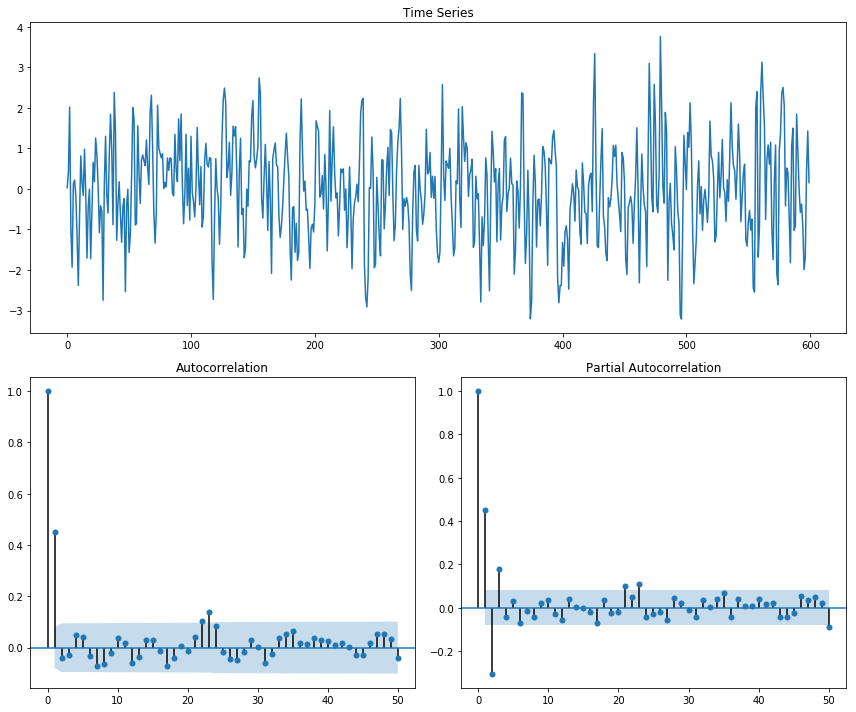

In [18]:
# Number of samples
n = 600

# Generate MA(1) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma1_data)

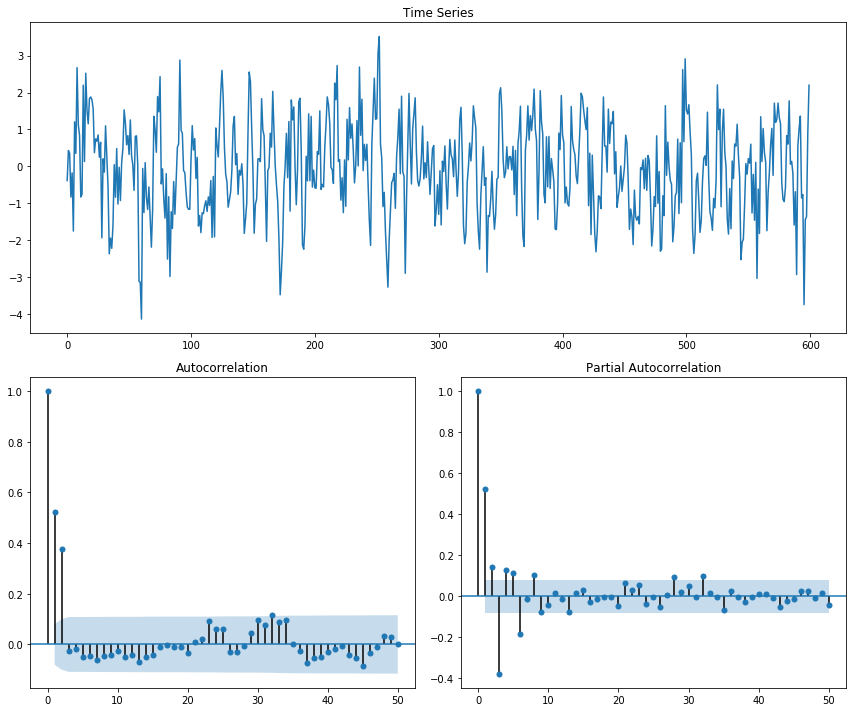

In [4]:
# Generate MA(2) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma2_data)

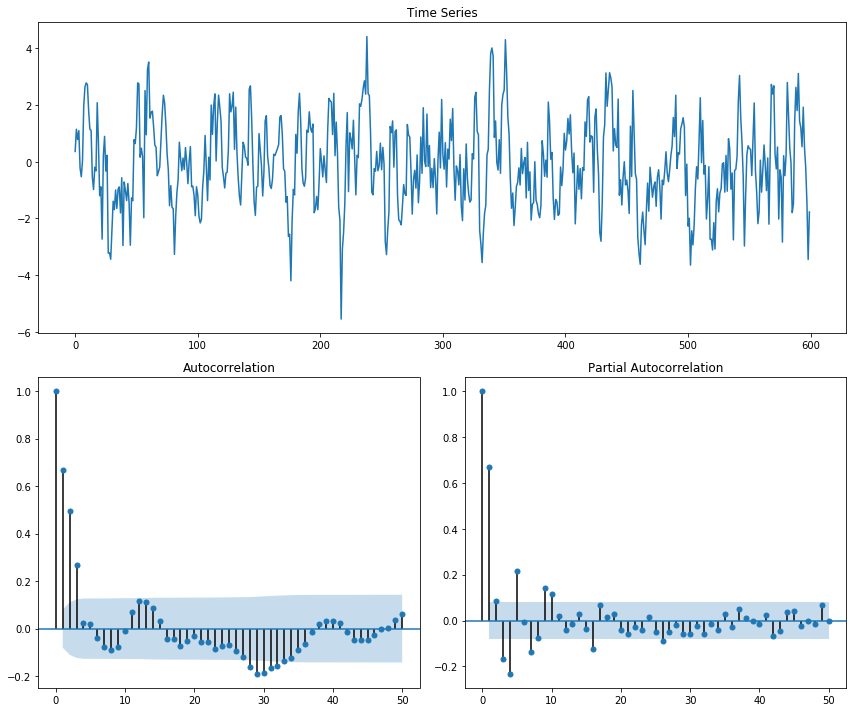

In [5]:
# Generate MA(3) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma3_data)


In [19]:
# Build MA(1) model
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ma1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -850.416
Method:                           mle   S.D. of innovations              0.998
Date:                Thu, 06 Feb 2020   AIC                           1704.831
Time:                        17:02:48   BIC                           1713.625
Sample:                             0   HQIC                          1708.255
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6401      0.030     21.171      0.000       0.581       0.699
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.5624           +0.0000j            1.5624            0.5000
-----------------------------------------------------------------------------
"""

In [8]:
# Build MA(3) model
ma3 = smtsa.ARMA(ma3_data.tolist(), order=(0, 3)).fit(
    maxlag=30, method='mle', trend='nc')
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -874.523
Method:                           mle   S.D. of innovations              1.038
Date:                Thu, 06 Feb 2020   AIC                           1757.045
Time:                        16:46:31   BIC                           1774.633
Sample:                             0   HQIC                          1763.892
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6323      0.036     17.670      0.000       0.562       0.702
ma.L2.y        0.6895      0.031     21.999      0.000       0.628       0.751
ma.L3.y        0.5202      0.036     14.386      0.000       0.449       0.591
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0481           -1.1618j            1.1628           -0.2434
MA.2            0.0481           +1.1618j            1.1628            0.2434
MA.3           -1.4216           -0.0000j            1.4216           -0.5000
-----------------------------------------------------------------------------
"""